In [2]:
#basic essential libraries
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk
import random
import string
#statsmodel
import statsmodels.api as sm
from scipy import stats
#to ignore warning messages
import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output

In [3]:
#Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#set visual parameters
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 10,6

In [4]:
#set path for working directory
PATH1 = "C:/Users/kpunyakoti/Desktop/Future/Flix/Data/"  
PATH2 = "C:/Users/kpunyakoti/Desktop/Future/Flix/Output/"

In [5]:
tick = pd.read_csv(f'{PATH1}orders_tickets.csv')
ch = pd.read_csv(f'{PATH1}orders_channels.csv')
cntry = pd.read_csv(f'{PATH1}orders_country.csv')

In [6]:
dftick = tick.copy()
dfch = ch.copy()
dfct = cntry.copy()

In [7]:
dfch2 = dfch.copy()
dfch2.drop_duplicates(inplace=True)
print(dfch2.shape)
print(dfch.shape)
print(dftick.shape)

(1970544, 3)
(2054059, 3)
(1999716, 3)


In [8]:
df = pd.merge(dftick,dfch2,  on = 'id')

In [9]:
df = pd.merge(df, dfct,  on = 'id')

In [10]:
df.head()

,id,n_tickets,type,date,channel_id,country_1,country_2
0,1586391,2,pax,2017-12-16,37.0,24.0,NaN
1,438232,2,pax,2017-04-25,39.0,24.0,NaN
2,270896,1,pax,2017-11-04,28.0,24.0,xx
3,1181593,2,pax,2017-07-24,28.0,9.0,7
4,964842,1,pax,2017-08-20,26.0,26.0,NaN


In [11]:
df.dtypes

id              int64
n_tickets       int64
type           object
date           object
channel_id    float64
country_1     float64
country_2      object
dtype: object

In [12]:
df.isna().sum()

id                 0
n_tickets          0
type               0
date               0
channel_id    278563
country_1      18097
country_2     759983
dtype: int64

In [13]:
print(dftick.shape)
print(dfct.shape)
print(dfch2.shape)
print(df.shape)

(1999716, 3)
(1917668, 3)
(1970544, 3)
(1946027, 7)


In [14]:
df.dtypes

id              int64
n_tickets       int64
type           object
date           object
channel_id    float64
country_1     float64
country_2      object
dtype: object

### Making Null fields as zeros and converting data types

In [15]:
df.country_1.isna().sum()

18097

In [16]:
df.country_1.fillna(0, inplace=True)

In [17]:
df.channel_id.fillna(0, inplace=True)

In [18]:
col_type = ['channel_id', 'country_1']

for x in col_type:
    df[x] = df[x].astype(int)

In [19]:
df.country_1.value_counts().head(11)

24    1102778
4      221831
11     197314
12      99806
27      48449
5       39245
23      38496
9       33836
21      27477
26      25094
0       18097
Name: country_1, dtype: int64

In [20]:
df.channel_id.value_counts().head()

39    1088971
0      278563
28     227721
37     200184
35     109434
Name: channel_id, dtype: int64

In [21]:
df.loc[df['country_2']=='xx', 'country_2'] = 0

In [22]:
df.country_2.fillna(0, inplace=True)

In [23]:
df['country_2'] = df['country_2'].astype(int)

In [24]:
df.country_2.value_counts().head()

0     851189
8      61155
13     61073
15     61069
12     61062
Name: country_2, dtype: int64

In [25]:
df.loc[(df['country_1'] == 0),'country_1'] = df['country_2']

In [26]:
df.country_1.value_counts().head(17)

24    1102778
4      222403
11     197874
12     100402
27      48449
5       39245
23      38496
9       34442
21      27477
26      25094
20      15970
19      14221
29      13684
32      10451
14       8949
7        8590
0        7799
Name: country_1, dtype: int64

### Treating Outliers

In [27]:
df_t1 = df.loc[((df['country_1']==17) & (df['n_tickets'] > 15))]
df_t1

,id,n_tickets,type,date,channel_id,country_1,country_2
806521,254059,70,pax,2017-06-20,0,17,0
1280733,735180,18,pax,2017-10-26,39,17,0


In [28]:
df_t2 = df.loc[((df['channel_id']==49) & (df['n_tickets'] > 8))]
df_t2

,id,n_tickets,type,date,channel_id,country_1,country_2
1190774,1895660,24,pax,2018-02-09,49,4,20


In [29]:
df.loc[((df['country_1']==17) & (df['id']==254059)), 'n_tickets'] = 20
df.loc[((df['country_1']==19) & (df['id']==1836980)), 'n_tickets'] = 21
df.loc[((df['country_1']==19) & (df['id']==1193211)), 'n_tickets'] = 21
df.loc[((df['country_1']==26) & (df['id']==1673213)), 'n_tickets'] = 27
df.loc[((df['country_1']==32) & (df['id']==655119)), 'n_tickets'] = 17

df.loc[((df['channel_id']==49) & (df['id']==1895660)), 'n_tickets'] = 10

In [30]:
df.head()

,id,n_tickets,type,date,channel_id,country_1,country_2
0,1586391,2,pax,2017-12-16,37,24,0
1,438232,2,pax,2017-04-25,39,24,0
2,270896,1,pax,2017-11-04,28,24,0
3,1181593,2,pax,2017-07-24,28,9,7
4,964842,1,pax,2017-08-20,26,26,0


### Null Treatment Analysis

In [31]:
df_2 = df.copy()

In [32]:
drop_cols = ['id', 'type', 'country_2']
for x in drop_cols:    
    df_2.drop(x, axis=1, inplace=True)

In [33]:
col_type2 = ['channel_id', 'country_1']

for x in col_type2:
    df_2[x] = df_2[x].astype(str)

In [34]:
df_2['date'] = pd.to_datetime(df_2['date'])

In [35]:
df_2.dtypes

n_tickets              int64
date          datetime64[ns]
channel_id            object
country_1             object
dtype: object

In [ ]:
pd.crosstab(df_2.country_1, df_2.channel_id, df_2.n_tickets, aggfunc = len)

In [37]:
ab = df_2.loc[df_2['channel_id']=='39'].country_1.unique()
ab.sort()
ab

array(['0', '1', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '23', '24', '26', '27', '28', '29', '3', '31',
       '32', '4', '5', '6', '7', '8', '9'], dtype=object)

In [38]:
ac = df_2.country_1.unique()
ac.sort()
ac

array(['0', '1', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '26', '27', '28', '29', '3',
       '31', '32', '4', '5', '6', '7', '8', '9'], dtype=object)

In [39]:
#drop country 22 as it has only two records
df_2.drop(df_2[df_2.country_1=='22'].index, inplace=True)

In [40]:
df_2.head()

,n_tickets,date,channel_id,country_1
0,2,2017-12-16,37,24
1,2,2017-04-25,39,24
2,1,2017-11-04,28,24
3,2,2017-07-24,28,9
4,1,2017-08-20,26,26


### Fill Nulls in country and channel by modes - country =24 and channel = 39

In [41]:
df_2.loc[df_2['country_1']=='0','country_1'] = '24'
df_2.loc[df_2['channel_id']=='0', 'channel_id'] = '39'

In [42]:
ch = df_2.channel_id.unique()
ch

array(['37', '39', '28', '26', '35', '31', '40', '29', '1', '17', '2',
       '49', '30', '38', '33', '23', '25', '8', '41', '36', '4', '5',
       '27', '42', '43', '24', '47', '32', '13'], dtype=object)

In [43]:
ct1 = df_2.country_1.unique()
ct1

array(['24', '9', '26', '11', '4', '15', '20', '27', '23', '5', '12', '7',
       '31', '29', '19', '32', '21', '8', '28', '14', '17', '16', '6',
       '3', '1', '18', '2', '13'], dtype=object)

#### so no values with 0 i.e., nulls are imputed by most common categories

## group the tickets by country and channel on a single day

In [44]:
#sort by date
df_sort = df_2.copy()
df_sort.sort_values(by='date', inplace=True)
df_sort.head()

,n_tickets,date,channel_id,country_1
504795,2,2017-01-01,39,20
1068437,1,2017-01-01,39,19
306713,1,2017-01-01,39,12
84642,1,2017-01-01,28,24
18778,1,2017-01-01,39,12


In [45]:
#reset indexes
df_ind = df_sort.reset_index()
df_ind.drop('index', axis =1, inplace=True)
df_ind.head()

,n_tickets,date,channel_id,country_1
0,2,2017-01-01,39,20
1,1,2017-01-01,39,19
2,1,2017-01-01,39,12
3,1,2017-01-01,28,24
4,1,2017-01-01,39,12


In [46]:
df_ind.loc[((df_ind['date']=='2017-01-01')&(df_ind['channel_id']=='37')&(df_ind['country_1']=='12'))]

,n_tickets,date,channel_id,country_1
485,1,2017-01-01,37,12
839,1,2017-01-01,37,12
1084,1,2017-01-01,37,12
1232,1,2017-01-01,37,12
1257,1,2017-01-01,37,12
2024,1,2017-01-01,37,12


#### as we see there are multiple ticket purchases on single day from same country through same channel. Lets group them

In [47]:
df_3 = pd.DataFrame({'tickets': df_ind.groupby(['date', 'channel_id', 'country_1'])['n_tickets'].sum()}).reset_index()

In [48]:
df_3.loc[((df_3['date']=='2017-01-01')&(df_3['channel_id']=='37')&(df_3['country_1']=='12'))]

,date,channel_id,country_1,tickets
44,2017-01-01,37,12,6


In [49]:
df_3.head()

,date,channel_id,country_1,tickets
0,2017-01-01,23,20,1
1,2017-01-01,23,24,2
2,2017-01-01,26,12,2
3,2017-01-01,26,24,6
4,2017-01-01,26,4,1


In [50]:
#adjusting an outlier
df_3.loc[((df_3['country_1']=='24') & (df_3['channel_id'] == '39') &(df_3['date']=='2017-10-29')), 'tickets'] = 4100

In [51]:
df_3.shape

(48432, 4)

In [52]:
df_3.tickets.sum()

2893893

In [53]:
df.n_tickets.sum()

2895039

### Make a dataframe with number of datapoints for each country, channel combination

In [54]:
country = df_3.country_1.unique()
channel = df_3.channel_id.unique()
dates = df_3.date.unique()

In [55]:
dates1 = []
for i in range(0,100):
    dates1.append(dates[i])
dates2 = []
for i in range(100,200):
    dates2.append(dates[i])
dates3 = []
for i in range(200,300):
    dates3.append(dates[i])
dates4 = []
for i in range(300,422):
    dates4.append(dates[i])

In [56]:
channel

array(['23', '26', '28', '29', '31', '35', '37', '39', '40', '17', '38',
       '49', '42', '5', '43', '33', '47', '1', '25', '32', '41', '27',
       '36', '13', '2', '30', '4', '8', '24'], dtype=object)

In [168]:
df_cols = ['country', 'channel', 'rowcount']
dpoints = pd.DataFrame(columns=df_cols)
#index through Model and ave performance to table
row_index=0
for x in country:
    for y in channel:
        dpoints.loc[row_index,'country'] = x
        dpoints.loc[row_index, 'channel'] = y
        df_rec = df_3.loc[((df_3['country_1'] == x) & (df_3['channel_id']== y)), 'date']
        dpoints.loc[row_index, 'rowcount'] = len(df_rec.index)
        
        row_index +=1

In [169]:
dpoints.rowcount.sum()

48432

In [170]:
dpoints.head()

,country,channel,rowcount
0,20,23,3
1,20,26,52
2,20,28,411
3,20,29,25
4,20,31,123


In [173]:
dpoints.to_csv(f'{PATH1}datapoint.csv')

#### Make a full dataframe for all records for country channel combo 

In [ ]:
df_full_cols = ['date', 'country', 'channel', 'tickets']
df_full = pd.DataFrame(columns = df_full_cols)
row_ind = 0
for d in dates1:
    print(d)
    for i in country:
        for j in channel:
            df_full.loc[row_ind,'date'] = d
            df_full.loc[row_ind, 'country'] = i
            df_full.loc[row_ind, 'channel'] = j
            
            row_ind +=1

In [117]:
df_full_1 = df_full.copy()

In [119]:
df_full = df_full_1.copy()
df_full = df_full.append(df_full_2)
df_full = df_full.append(df_full_3)
df_full = df_full.append(df_full_4)

In [ ]:
df_3.dtypes

In [130]:
df_full['date'] = pd.to_datetime(df_full['date'])
df_full['date'] = df_full['date'].dt.date

In [133]:
#save the structure in a dataframe before merging
df_full_structure = df_full.copy()

In [135]:
df_full.rename(columns = {"country":"country_1", "channel" : "channel_id"}, inplace=True)

In [136]:
df_full = pd.merge(df_full, df_3, on = ['date', 'country_1', 'channel_id'], how = 'left')

In [138]:
df_full.drop('tickets_x', axis = 1, inplace=True)
df_full.rename(columns = {"tickets_y" : "tickets"}, inplace=True)

In [140]:
df_full.fillna(0,inplace=True)

In [144]:
df_full['tickets'] = df_full['tickets'].astype(int)

In [148]:
df_full.tickets.sum()

2895037

In [150]:
df.n_tickets.sum()

2895039

In [ ]:
df_full.sort_values('date', inplace=True)
df_full.set_index('date', inplace=True)

In [161]:
train = df_full.loc['2017']
test = df_full['2018']

In [162]:
print(train.shape)
print(test.shape)

(296380, 3)
(46284, 3)


In [165]:
train.to_csv(f'{PATH1}train.csv')
test.to_csv(f'{PATH1}test.csv')

### ---Train and Test sets are Prepared---

## TimeSeries

In [901]:
ctry_counter = ['24']
ch_counter = ['39']
for x in ctry_counter:
    for y in ch_counter:
        tf = train.loc[((train['country_1']==x)&(train['channel_id']==y)), ['date','tickets']]

In [903]:
tf.loc[tf['date']=='2017-10-29', 'tickets'] = 4100

In [905]:
tf.head()

,date,tickets
71,2017-01-01,1396
173,2017-01-02,2162
275,2017-01-03,1819
378,2017-01-04,1796
478,2017-01-05,1903


In [906]:
tf.set_index('date', inplace=True)
tf.head()

,tickets
date,
2017-01-01,1396
2017-01-02,2162
2017-01-03,1819
2017-01-04,1796
2017-01-05,1903


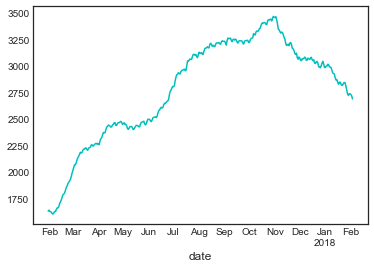

In [861]:
tf['tickets'].rolling(30).mean().plot(color = 'c')

## Indentify Stationarity
### 1. Rolling Stats Test

In [898]:
dfw = tf.reset_index()
#dfw.drop('index', axis =1, inplace=True)
dfw.head()

,date,tickets
0,2017-01-01,1396
1,2017-01-02,2162
2,2017-01-03,1819
3,2017-01-04,1796
4,2017-01-05,1903


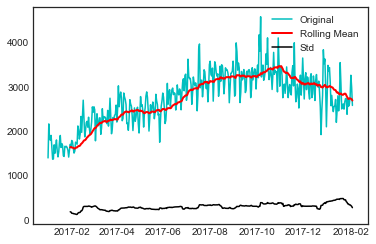

In [863]:
plt.plot(dfw['date'], dfw['tickets'], color = 'c', label = 'Original')
plt.plot(dfw['date'], dfw['tickets'].rolling(30).mean(), color = 'red', linewidth = 2, label = 'Rolling Mean')
plt.plot(dfw['date'], dfw['tickets'].rolling(30).std(), color = 'black', label = 'Std')
plt.legend(loc = 'upper right')

### 2. Dickey Fuller Test

In [864]:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest = adfuller(tf['tickets'], autolag = 'AIC')

dfout = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'No. of Observations Used'])

for key, value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value

print(dfout)
print('-')

Results of Dickey-Fuller Test:
Test Statistic               -2.284919
p-value                       0.176878
#Lags Used                   14.000000
No. of Observations Used    384.000000
Critical value (1%)          -3.447495
Critical value (5%)          -2.869096
Critical value (10%)         -2.570795
dtype: float64
-


#### DF Test states that there is no stationarity as the p-value is very low and also critical values are higher than test statistic
#### Try transfolrming values to log scale and test again to confirm the stationarity


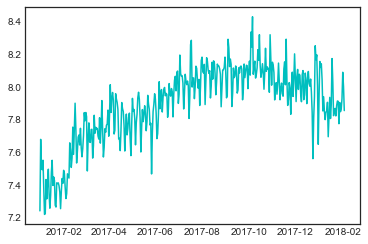

In [865]:
#transforimg to log scale
df_logscale = np.log(tf)

plt.plot(df_logscale, color = 'c')

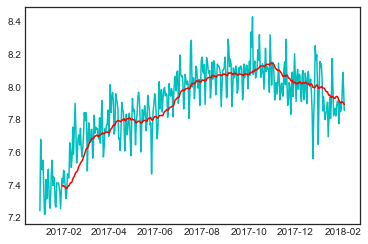

In [866]:
movavg = df_logscale.rolling(30).mean()
movstd = df_logscale.rolling(30).std()
plt.plot(df_logscale, color = 'c')
plt.plot(movavg, color = 'r')

In [867]:
#get difference between moving avg and actual number of incidents

dflogminusmovavg = df_logscale - movavg
dflogminusmovavg.head(10)

#Remove null values
dflogminusmovavg.dropna(inplace=True)
dflogminusmovavg.head(10)

,tickets
date,
2017-01-30,0.045763
2017-01-31,0.010921
2017-02-01,0.096904
2017-02-02,0.080011
2017-02-03,-0.001320
2017-02-04,-0.063421
2017-02-05,-0.031720
2017-02-06,0.081291
2017-02-07,0.059843


In [868]:
#Dickey-fuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #determine rolling stats
    movavg = timeseries.rolling(30).mean()
    movstd = timeseries.rolling(30).std()
    
    #plot rolling stats
    orig = plt.plot(timeseries, color = 'c', label = 'Original')
    mean = plt.plot(movavg, color = 'r', label = 'Mean')
    std = plt.plot(movstd, color = 'black', label = 'std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Std Dev')
    plt.show(block = False)
    
    #perform Dickey-fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['tickets'], autolag = 'AIC')
    dfout = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'No. of Observations Used'])
    for key, value in dftest[4].items():
        dfout['Critical value (%s)'%key] = value
    print(dfout)
    

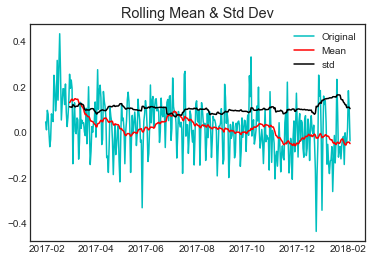

Results of Dickey-Fuller Test:
Test Statistic               -3.338415
p-value                       0.013246
#Lags Used                   14.000000
No. of Observations Used    355.000000
Critical value (1%)          -3.448906
Critical value (5%)          -2.869716
Critical value (10%)         -2.571126
dtype: float64


In [869]:
test_stationarity(dflogminusmovavg)

Text(0.5,1,'Log Shift Data')

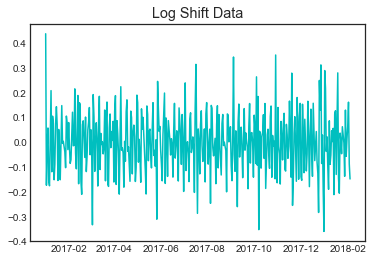

In [870]:
#shift logdata 

dflogshift = df_logscale - df_logscale.shift()
plt.plot(dflogshift, color = 'c')
plt.title('Log Shift Data')

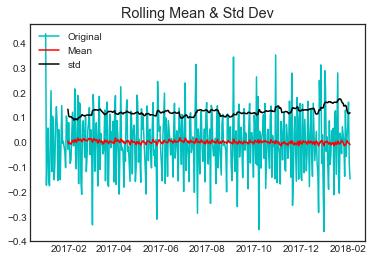

Results of Dickey-Fuller Test:
Test Statistic             -7.628246e+00
p-value                     2.041287e-11
#Lags Used                  1.300000e+01
No. of Observations Used    3.840000e+02
Critical value (1%)        -3.447495e+00
Critical value (5%)        -2.869096e+00
Critical value (10%)       -2.570795e+00
dtype: float64


In [871]:
dflogshift.dropna(inplace=True)
#test stationarity of log shift data
test_stationarity(dflogshift)

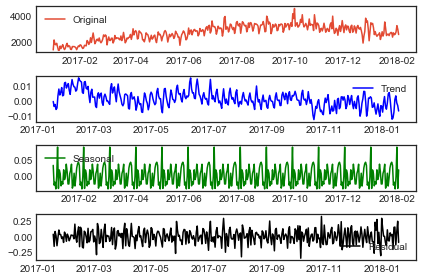

In [872]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd
decomposition = sd(dflogshift, freq = 30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(tf, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label = 'Trend', color = 'b')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal', color = 'g')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = 'Residual', color = 'black')
plt.legend(loc='best')
plt.tight_layout()

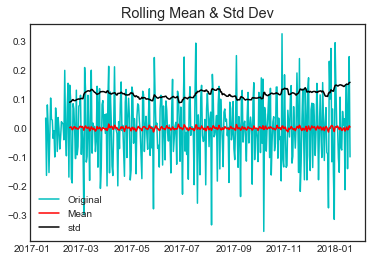

Results of Dickey-Fuller Test:
Test Statistic             -8.806086e+00
p-value                     2.050046e-14
#Lags Used                  1.500000e+01
No. of Observations Used    3.520000e+02
Critical value (1%)        -3.449065e+00
Critical value (5%)        -2.869786e+00
Critical value (10%)       -2.571163e+00
dtype: float64


In [873]:
#test_stationarity - pass noise to check if it is stationary or not - residual data
decomposedData = residual
decomposedData.dropna(inplace=True)
test_stationarity(decomposedData)

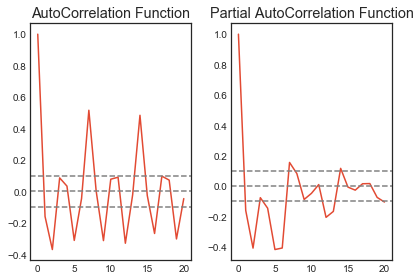

In [874]:
#ACF and PACF
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(dflogshift, nlags = 20)
lag_pacf = pacf(dflogshift, nlags = 20, method = 'ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(dflogshift)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(dflogshift)), linestyle = '--', color = 'gray')
plt.title('AutoCorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(dflogshift)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(dflogshift)), linestyle = '--', color = 'gray')
plt.title('Partial AutoCorrelation Function')
plt.tight_layout()

From the graphs above - we can take p = 2, q = 2 where they are cutting 0 levels.

From shifting, we have shifted the data only once and hence the d =1

Plotting AR model


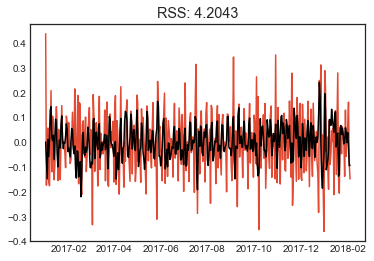

In [875]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model = ARIMA(df_logscale, order=(2,1,2))
results_AR = model.fit(disp = -1)
plt.plot(dflogshift)
plt.plot(results_AR.fittedvalues, color = 'black')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-dflogshift['tickets'])**2))
print('Plotting AR model')

In [234]:
#try values for p and q
model2 = ARIMA(df_logscale, order=(6,1,5))
results_AR2 = model2.fit(disp = -1)
plt.plot(dflogshift)
plt.plot(results_AR2.fittedvalues, color = 'black')
plt.title('RSS: %.4f'%sum((results_AR2.fittedvalues-dflogshift['tickets'])**2))

NameError: name 'ARIMA' is not defined

In [884]:
pred_ARIMA_diff = pd.Series(results_AR2.fittedvalues, copy = True)
print(pred_ARIMA_diff.head())

date
2017-01-02    0.001292
2017-01-03   -0.067631
2017-01-04   -0.144573
2017-01-05    0.049201
2017-01-06   -0.051892
dtype: float64


In [885]:
#convert ot cumulative sum
pred_ARIMA_diff_cumsum = pred_ARIMA_diff.cumsum()
print(pred_ARIMA_diff_cumsum.head())

date
2017-01-02    0.001292
2017-01-03   -0.066339
2017-01-04   -0.210912
2017-01-05   -0.161711
2017-01-06   -0.213603
dtype: float64


In [886]:
pred_ARIMA_log = pd.Series(df_logscale['tickets'].ix[0], index=df_logscale.index)
pred_ARIMA_log = pred_ARIMA_log.add(pred_ARIMA_diff_cumsum, fill_value =0)
pred_ARIMA_log.head()

date
2017-01-01    7.241366
2017-01-02    7.242658
2017-01-03    7.175027
2017-01-04    7.030454
2017-01-05    7.079655
dtype: float64

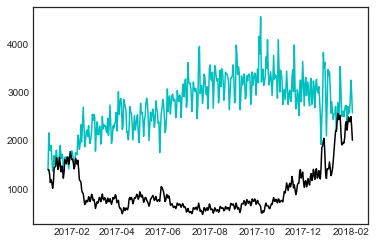

In [887]:
pred_ARIMA = np.exp(pred_ARIMA_log)
plt.plot(tf, color = 'c')
plt.plot(pred_ARIMA, color = 'black')

In [888]:
df_logscale

,tickets
date,
2017-01-01,7.241366
2017-01-02,7.678789
2017-01-03,7.506042
2017-01-04,7.493317
2017-01-05,7.551187
2017-01-06,7.394493
2017-01-07,7.219642
2017-01-08,7.224753
2017-01-09,7.433075


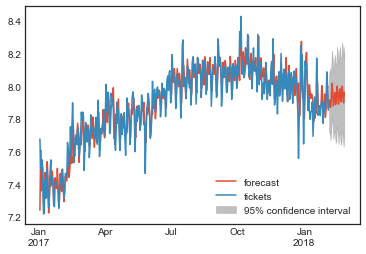

In [889]:
results_AR2.plot_predict(1,420)
x = results_AR2.forecast(steps = 21)

In [890]:
preds_array = results_AR2.forecast(steps = 21, alpha = 0.05)[0]

In [891]:
final_preds = np.exp(preds_array)
final_preds

array([2656.82334432, 2743.65381082, 2618.27467237, 2729.9600225 ,
       3035.5962505 , 2908.38559378, 2648.06348448, 2775.33463113,
       2873.32182589, 2670.43508049, 2714.57643612, 2987.49248928,
       2881.4471063 , 2674.87059989, 2837.64805709, 2937.7612886 ,
       2713.8468318 , 2733.02138264, 2985.61481499, 2883.56032981,
       2697.2989878 ])

In [892]:
preds_2 = np.exp(results_AR2.forecast(steps = 21, alpha = 0.05)[2])
preds_2

array([[2245.61145206, 3143.3355385 ],
       [2258.95673995, 3332.35077081],
       [2141.01084417, 3201.92785508],
       [2228.83346345, 3343.75889748],
       [2478.32040978, 3718.18129718],
       [2373.89548513, 3563.21784808],
       [2154.55969576, 3254.60474901],
       [2229.3958883 , 3454.96390083],
       [2279.29723993, 3622.15957202],
       [2108.75642774, 3381.71987304],
       [2137.05562908, 3448.16724808],
       [2345.72615355, 3804.83943532],
       [2259.77933773, 3674.13635827],
       [2092.93112094, 3418.61834562],
       [2205.25115866, 3651.39656055],
       [2268.66488991, 3804.19401173],
       [2089.06693744, 3525.48044033],
       [2096.17770612, 3563.34572979],
       [2280.71217943, 3908.38261129],
       [2198.43270743, 3782.20363424],
       [2051.92140727, 3545.66300825]])

In [893]:
lim_cols = ['lower','preds', 'upper']
limits = pd.DataFrame(columns = lim_cols)

In [894]:
rindex = 0
for i in range(0,len(preds_2)):
    limits.loc[rindex,'lower'] = preds_2[i][0]
    limits.loc[rindex,'preds'] = final_preds[i]
    limits.loc[rindex,'upper'] = preds_2[i][1]
    rindex +=1

In [896]:
limits.head()

,lower,preds,upper
0,2245.61,2656.82,3143.34
1,2258.96,2743.65,3332.35
2,2141.01,2618.27,3201.93
3,2228.83,2729.96,3343.76
4,2478.32,3035.6,3718.18


In [831]:
limits.to_csv(f'{PATH1}limits.csv')

In [ ]:
df_2.groupby(['channel_id'])['n_tickets'].describe()

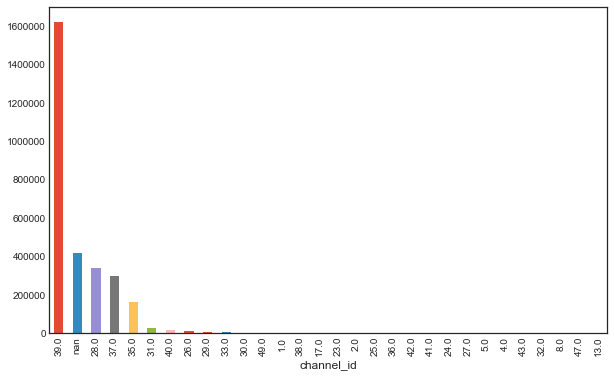

In [207]:
df.groupby('channel_id')['n_tickets'].sum().sort_values(ascending=False).plot(kind='bar')

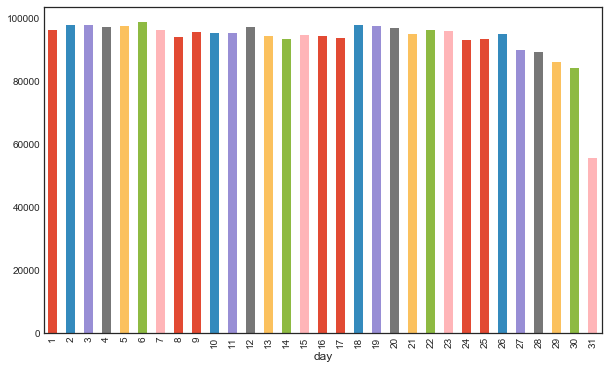

In [226]:
df.groupby('day')['n_tickets'].sum().plot(kind='bar')

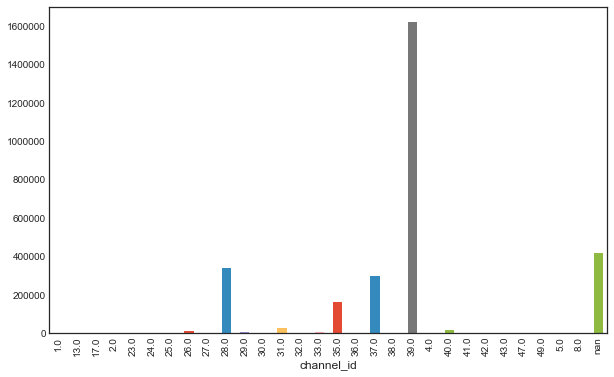

In [224]:
df.groupby('country_1')['n_tickets'].sum().plot(kind='bar')

In [57]:
pch = df_3.loc[((df_3.country_1 == '12')&(df_3.channel_id=='29')), ['date', 'tickets']]

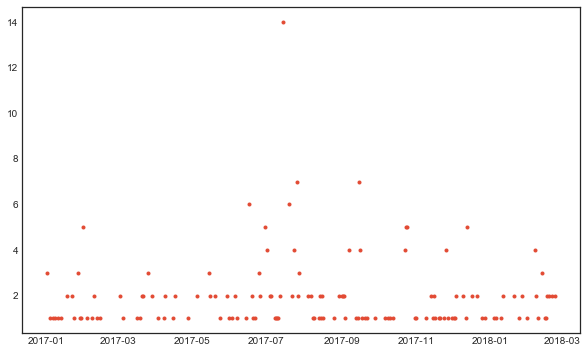

In [62]:
plt.plot(pch.date, pch.tickets, '.')

(array([1.941982e+06, 3.182000e+03, 5.080000e+02, 1.830000e+02,
        8.800000e+01, 4.100000e+01, 3.000000e+01, 6.000000e+00,
        3.000000e+00, 4.000000e+00]),
 array([ 1. ,  9.3, 17.6, 25.9, 34.2, 42.5, 50.8, 59.1, 67.4, 75.7, 84. ]),
 <a list of 10 Patch objects>)

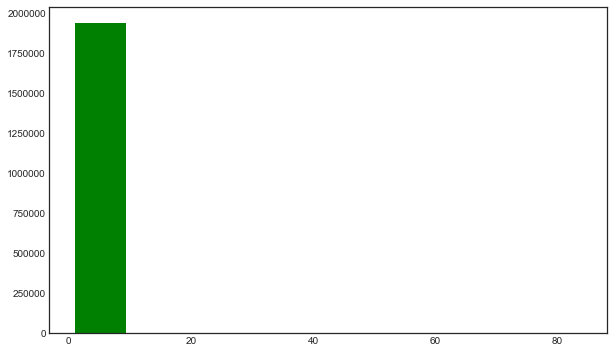

In [228]:
plt.hist(x=df['n_tickets'], color='g')

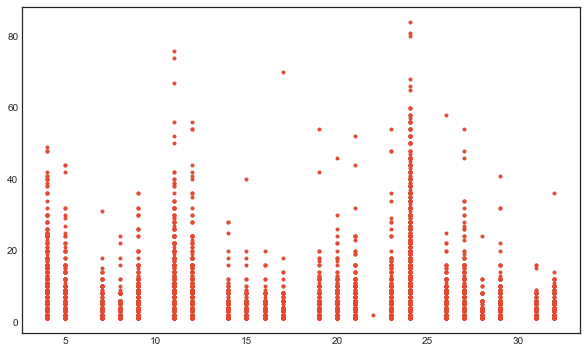

In [428]:
plt.plot(df.country_1, df.n_tickets, '.')

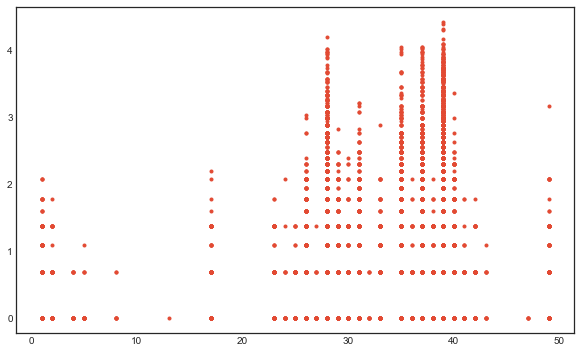

In [432]:
plt.plot(df.channel_id, np.log(df.n_tickets), '.')

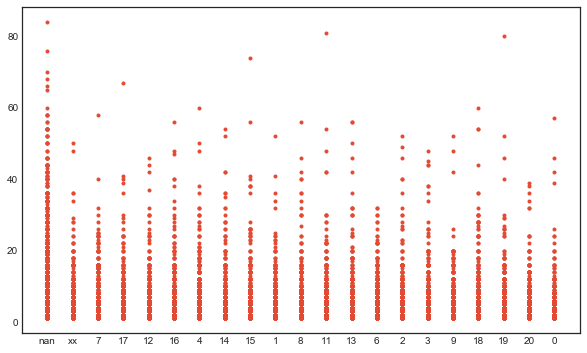

In [236]:
plt.plot(df.country_2, df.n_tickets, '.')


 mu = 0.27 and sigma = 0.45



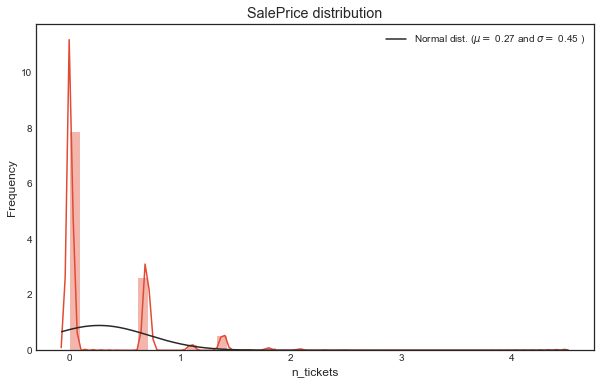

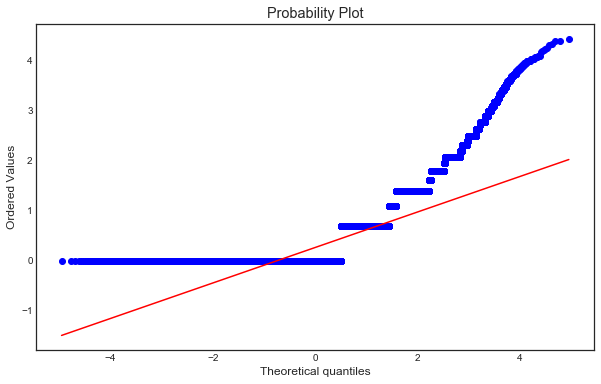

In [251]:
from scipy.stats import norm
sns.distplot(np.log(df['n_tickets']), fit=norm);


(mu, sigma) = norm.fit(np.log(df['n_tickets']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(np.log(df['n_tickets']), plot=plt)
plt.show()

In [833]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [834]:
tr1 = train.set_index('date')
tst1 = test.set_index('date')

In [835]:
tr1.head()

,channel_id,country_1,tickets
date,,,
2017-01-01,23,20,1
2017-01-01,23,24,2
2017-01-01,26,12,2
2017-01-01,26,24,6
2017-01-01,26,4,1


In [837]:
tst1.drop('tickets', axis=1, inplace = True)